# 运动模式

## 求解平衡位置

$u_{j}-\sum_{n=1}^{j-1}1/(u_{j}-u_{n})^{2}+\sum_{n=j+1}^{N}1/(u_{j}-u_{n})^{2}=0,$
$u_{n}\equiv z_{n}^{0}/\ell$ $(n=1,2,\dots,N),$
where $\ell\equiv\sqrt[3]{e^{2}/4\pi\epsilon_{0}M\omega_{z}^{2}}$

In [1]:
import numpy as np
from scipy.optimize import fsolve
%matplotlib inline
import matplotlib.pyplot as plt
def position(x):
    n = len(x)
    e = np.zeros(n) #n个平衡方程
    for i in range(1,n-1):
        for j in range(0,i):
            e[i] = e[i] - 1/(x[i]-x[j])**2
        for k in range(i+1,n):
            e[i] = e[i] + 1/(x[i]-x[k])**2
        e[i] = e[i] + x[i]
    for i in range(1,n):
        e[0] = e[0] + 1/(x[0]-x[i])**2
    e[0] = e[0] + x[0]
    for i in range(0,n-1):
        e[n-1] = e[n-1] - 1/(x[n-1]-x[i])**2
    e[n-1] = e[n-1] + x[n-1]    
    return(np.array(e))
result = fsolve(position, [0,1,2,3])
print(result)

[-1.43680199 -0.45437928  0.45437928  1.43680199]


## 径向运动模式

$\begin{equation}
A_{nj}^{\xi}=\left\{ \begin{array}{ll}
\beta_{\xi}^{2}+\sum\limits _{p=1,p\not=j}^{N}a_{\xi}/|u_{j}-u_{p}|^{3} & (n=j)\\
-a_{\xi}/|u_{j}-u_{n}|^{3} & (n\not=j),
\end{array}\right.
\end{equation}$
with $\beta_{\xi}=\omega_{\xi}/\omega_{z}$, $a_{x}=a_{y}=-1$, and
$a_{z}=2$ 

In [72]:
# 求解径向频率分布
def Frequence_rr(n,m1,m2,b,b1,b2):  # b为w_r/w_z
#     A_z = np.zeros((n,n)) #展开矩阵
    A_r = np.zeros((n,n))
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
#                 A_z[i][j] = -2/abs(u[i]-u[j])**3
#                 A_z[i][i] = A_z[i][i] + 2/abs(u[i]-u[j])**3
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
#         A_z[i][i] = A_z[i][i] + 1
        A_r[i][i] = A_r[i][i] + b**2
#     A_z[m1][m1] = A_z[m1][m1] + b1**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
#     A_z[m2][m2] = A_z[m2][m2] + b3**2
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
#     a_z,b_z = np.linalg.eig(A_z)
    a_r,b_r = np.linalg.eig(A_r)
    return a_r,b_r


In [73]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

def plot_func(t,b):
    F = Frequence_rr(10,b,4,5,t,t,t,t)
    plt.plot(np.sqrt(F[2]),'o')
    plt.ylim(0,50)
    
interact(plot_func, t = widgets.FloatSlider(value=5, 
               min=5, 
               max=100, 
               step=0.1),b = widgets.FloatSlider(value=5, 
               min=0, 
               max=50), 
               step=0.1)
plt.show()

interactive(children=(FloatSlider(value=5.0, description='t', min=5.0), FloatSlider(value=5.0, description='b'…

# Dipole Trap 参数估算

In [74]:
from sympy import *
init_printing()
from scipy.constants import c as c0
from scipy.constants import m_p
from scipy.constants import hbar as h

m,c,omega0,Gamma,Delta,delta, I, w0,hbar,wavelen,w,P = symbols('m, c, \omega_0, \Gamma,\Delta,\delta, I, w_0,\hbar,\lambda,w,P ')
# omega0, 共振角频率
# w0     激光的半峰宽

## Dipole 深度

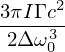

In [75]:
U_dip = 3*pi*c**2*Gamma*I/(2*omega0**3*Delta)
U_dip

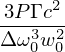

In [76]:
I_0 = 2*P/(pi*w0**2)
U_0 = U_dip.subs({I:I_0})
U_0

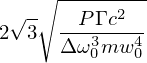

In [77]:
W_z = sqrt(4*U_0/(m*w0**2))
W_z

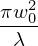

In [78]:
Z_R = pi*(w0)**2/wavelen
Z_R

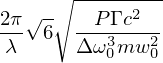

In [79]:
W_x = 2*pi/wavelen*sqrt(2*U_0/(m))
W_x

In [80]:
paras={
    Gamma: 20e6*2*pi,
    omega0: 2*pi*c/(0.369e-6),
    Delta: 2*pi*200e9,
    w0:    0.5e-6,
    m:     171*m_p,
    P:     1e-3,
    delta: 2*pi*12.6e9,
    c:  c0,
    wavelen: (0.369e-6),
    delta: 2*pi*12.6e9,
    hbar: h
}

V_x = N(W_x.subs(paras)/(2*pi))
print(V_x/1e6)

V_z = N(W_z.subs(paras)/(2*pi))
print(V_z/1e6)

6.45270343683483
1.07184798759475


In [81]:
c_lamb = 2*(2*pi/wavelen)*sqrt(hbar/(2*m))
c_lamb = float(N(c_lamb.subs(paras)))
c_lamb
## yeta = c_lamb/sqrt(w)

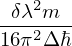

In [82]:
omega_j = U_0 * delta/(2*Delta*hbar)
omega_j/W_x**2

In [83]:
c_rabi = omega_j/W_x**2
## Rabi = c_rabi * W_x**2
c_rabi = float(N(c_rabi.subs(paras)))
c_rabi

In [84]:
c_optic = W_x/sqrt(P)
c_optic = float(N(c_optic.subs(paras)))
c_optic 

# 计算保真度

In [85]:
from scipy.special import jn
jn(1,0.2)  #jn(n, x)

In [86]:
from sympy import *
from scipy.integrate import tplquad,dblquad,quad

x = symbols('x')
t = symbols('t')
b=1
j = integrate(sin(x)*sin(b*sin(x)), (x, 1, 2)).evalf()
print(j)


0.781917175280174


### 数值积分

In [89]:
def int_1(w,b,u,tao):
    jf,err = quad(lambda t:np.sin(w*t)*np.sin(b*np.sin(u*t)),#函数
               0,#x下界0
               tao) 
    return jf
def int_2(w,b,u,tao):
    jf,err = quad(lambda t:np.cos(w*t)*np.sin(b*np.sin(u*t)),#函数
               0,#x下界0
               tao)
    return jf
def int_3(w,b,u,tao):
    jf,err = dblquad(lambda y,x:np.sin(w*(x-y))*np.sin(b*np.sin(u*x))*sin(b*np.sin(u*y)),#函数
                  0,#t2下界0
                  tao,#t2上界tao
                  lambda x:0,#t1下界0
                  lambda x:x)#t1上界x
    return jf
int_1(1,2,3,4)

In [90]:
from scipy import integrate
import math
import numpy as np

options={'limit':300}

def integrand(t1, t2, tao, beta, u, w):
        return math.sin(w*(t1-t2))*math.sin(beta*math.sin(u*t1))*math.sin(beta*math.sin(u*t2))

def bounds_t1(tao, beta, u, w):
        return [0, tao]
def bounds_t2(t1 ,tao ,beta, u, w):
        return [0, t1]

def int_4(tao, beta, u, w):
    result = integrate.nquad(integrand, [bounds_t2, bounds_t1], args=(tao ,beta, u, w), opts=[options,options])
    return(-result[0])


## Coupling

In [91]:
def Coupling(n,n1,n2,b,w1,w2): #n1,n2 为加上激光的离子，n为离子总数,返回耦合系数，解出的频率本征值，频率本征态
    g = np.zeros((2,n))
    b1 = w1/(2*np.pi*1e5)
    b2 = w2/(2*np.pi*1e5)
    F = Frequence_rr(n,n1,n2,b,b1,b2)
    w_r = np.sqrt(F[0])*2*np.pi*1e5 
    b_r = F[1].T
    for i in range(0,n): ##第i个模式与第n1,n2个离子耦合
        g[0][i] = c_lamb * b_r[i][n1] / np.sqrt(w_r[i])
        g[1][i] = c_lamb * b_r[i][n2] / np.sqrt(w_r[i])
    return g,w_r,b_r

In [92]:
print(Coupling(10,4,5,5,0*6e6,0*4e6)[1]/(2*np.pi*1e5))
print(Coupling(10,4,5,5,0*6e6,0*4e6)[0][0]*Coupling(10,4,5,5,0*6e6,0*4e6)[0][1])

[1.96970689 2.71462492 3.25638926 3.68454384 4.03414195 5.
 4.89897949 4.75178246 4.32280393 4.56028474]
[-0.06007199  0.01044031 -0.01039343  0.00960678 -0.00317512  0.00680565
 -0.00017758  0.00749613  0.00850255 -0.0009414 ]


In [353]:
print(Coupling(10,4,5,5,50*w_0,40*w_0)[0])

[[ 8.23934555e-02 -5.69963032e-04 -2.90472528e-04 -3.59395545e-04
   1.29619048e-04 -7.90680405e-05 -2.16830100e-04 -1.54062599e-04
   2.91442831e-04  2.24916325e-04]
 [ 5.09981068e-04  9.20559746e-02  4.68525684e-04 -5.49418236e-04
   2.02814512e-04  1.24226703e-04 -3.37739625e-04  2.43481773e-04
   4.50583540e-04 -3.58470035e-04]]


Text(0.5, 0, '$\\omega_{optic}\\ (MHz)$')

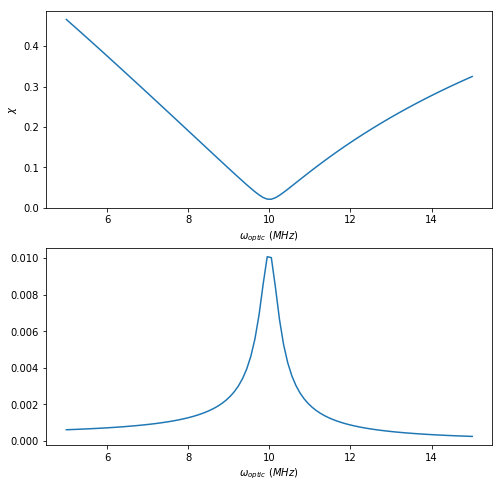

In [656]:
I = np.linspace(5,15,100)
x = np.zeros(100)
cou = np.zeros(100)
for i,ii in enumerate(I):
    x[i] = (Coupling(10,4,5,5,10e6,ii*1e6)[1][0]-Coupling(10,4,5,5,10e6,ii*1e6)[1][1])/max(Coupling(10,4,5,5,10e6,ii*1e6)[1][0],Coupling(10,4,5,5,10e6,ii*1e6)[1][1])
    cou[i] = (Coupling(10,4,5,5,10e6,ii*1e6)[0][0]*Coupling(10,4,5,5,10e6,ii*1e6)[0][1])[0]

plt.figure(figsize=(8,8))
plt.subplot(211)
plt.plot(I,x)
plt.xlabel('$\omega_{optic}\ (MHz)$')
plt.ylabel('$\chi $')

plt.subplot(212)
plt.plot(I,cou)
plt.xlabel('$\omega_{optic}\ (MHz)$')


    

In [655]:
Coupling(10,4,5,5,0*1e6,0*1e6)[0]

array([[ 0.24509587, -0.10217785,  0.10194818, -0.09801416, -0.05634819,
         0.08249634, -0.01332605, -0.08658018, -0.09220926,  0.03068223],
       [-0.24509587, -0.10217785, -0.10194818, -0.09801416,  0.05634819,
         0.08249634,  0.01332605, -0.08658018, -0.09220926, -0.03068223]])

### 两离子近似

In [95]:
# 求解径向频率分布
def F_rr(n,m1,m2,b,w1,w2):  # b为w_r/w_z
    A_r = np.zeros((n,n))  #展开矩阵
    A = np.zeros((2,2))
    g = np.zeros((2,2))
    b1 = w1/(2*np.pi*1e5)
    b2 = w2/(2*np.pi*1e5)
    u = fsolve(position, np.linspace(0,n-1,n))
    for i in range(0,n):
        for j in range(0,n):
            if i != j:
                A_r[i][j] = 1/abs(u[i]-u[j])**3
                A_r[i][i] = A_r[i][i] - 1/abs(u[i]-u[j])**3
        A_r[i][i] = A_r[i][i] + b**2
    A_r[m1][m1] = A_r[m1][m1] + b1**2 
    A_r[m2][m2] = A_r[m2][m2] + b2**2 
    A[0][0] = A_r[m1][m1]
    A[1][1] = A_r[m2][m2]
    A[0][1] = A_r[m1][m2]
    A[1][0] = A_r[m2][m1]
    a_r,b_r = np.linalg.eig(A)
    w_r = np.sqrt(a_r)*2*np.pi*1e5
    for i in range(0,2):
        g[0][i] = c_lamb * b_r[0][i] / np.sqrt(w_r[i])
        g[1][i] = c_lamb * b_r[1][i] / np.sqrt(w_r[i])
    return g,w_r,b_r

In [96]:
print(Coupling(10,4,5,10,0,0)[1],F_rr(10,4,5,10,0,0)[1])

[5580365.15181489 5702460.18816724 5813358.12068    5913404.1974096
 6002803.49798509 6283185.30717959 6251690.44565659 6206675.23317271
 6081611.67316635 6149701.02359614] [5678560.64580164 6053281.10657701]


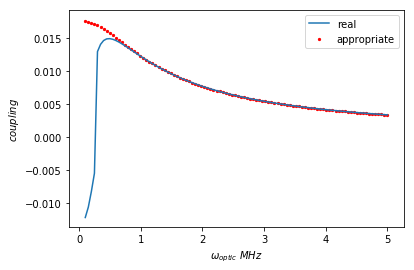

In [106]:
U = np.linspace(0.1,5,100)
g_0 = np.zeros(100)
g_1 = np.zeros(100)
for i,u in enumerate(U):
    u = 2*np.pi*1e6*u
    g_0[i] = Coupling(10,4,5,10,u,u)[0][0][0]*Coupling(10,4,5,10,u,u)[0][1][0]
    g_1[i] = F_rr(10,4,5,10,u,u)[0][0][1]*F_rr(10,4,5,10,u,u)[0][1][1]

plt.plot(U,g_0)
plt.scatter(U,g_1,s=5,marker='o',c='red')
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$coupling $')
plt.legend(('real', 'appropriate'),loc='upper right')


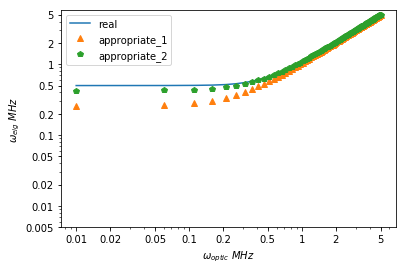

In [104]:
U = np.linspace(0.01,5,100)
w_0 = np.zeros(100)
w_1 = np.zeros(100)
w_2 = np.zeros(100)
for i,u in enumerate(U):
    u = 2*np.pi*1e6*u
    w_0[i] = max(Coupling(10,4,5,5,u,u)[1])*1e-6/(2*np.pi)
    w_1[i] = F_rr(10,4,5,5,u,u)[1][0]*1e-6/(2*np.pi)
    w_2[i] = F_rr(10,4,5,5,u,u)[1][1]*1e-6/(2*np.pi)
plt.loglog(U,w_0)
plt.loglog(U,w_1,'^' )
plt.loglog(U,w_2,'p')
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.legend(('real', 'appropriate_1','appropriate_2'),loc='upper left')


### frequency tailor

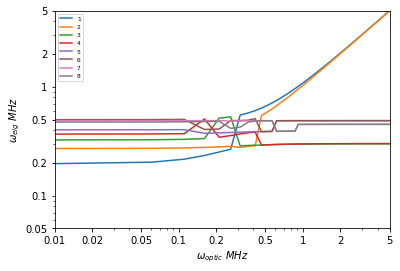

In [107]:
U = np.linspace(0.01,5,100)
w_0 = np.zeros((8,100))

for j in range(8):
    for i,u in enumerate(U):
        u = u*1e6*2*np.pi
        w_0[j][i] = Coupling(10,4,5,5,u,u)[1][j]*1e-6/(2*np.pi)
for i in range(8):
    plt.loglog(U,w_0[i])
tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
plt.xticks(tick_locs, tick_locs)
plt.yticks(Tick_locs, Tick_locs)
plt.xlabel('$\omega_{optic} \ {MHz}$')
plt.ylabel('$\omega_{eig} \ {MHz}$')
plt.xlim(0.01,5)
plt.ylim(0.05,5)
plt.legend(('1','2','3','4','5','6','7','8'),fontsize=6)


## Displacement

In [93]:
def Displacement(g,w_r,beta,u,tao): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    a = np.zeros((2,n))
    for k in range(0,n):
        jf1 = int_1(w_r[k],beta,u,tao)
        jf2 = int_2(w_r[k],beta,u,tao)
        a[0][k] = g[0][k]**2 * (jf1**2 + jf2**2)
        a[1][k] = g[1][k]**2 * (jf1**2 + jf2**2)
    return a

## Phi

In [94]:
def Phi(g,w_r,beta,u,tao):
    n = len(w_r)
    phi = 0
#     w_r = w_r*1e-6
#     u = u*1e-6
#     tao = tao*1e6
    for k in range(0,n):
        jf = int_4(tao, beta, u, w_r[k])
        phi = phi + 2*g[0][k]*g[1][k]*jf
    return phi

## 保真度，以及定义两个常数

\begin{equation}
\alpha_{\xi,j}^{k}=\frac{\Omega_{j}g_{\xi,j}^{k}\left\{ \mu+e^{i\omega_{\xi,k}\tau}[-\mu\cos(\mu\tau)+i\omega_{\xi,k}\sin(\mu\tau)]\right\} }{(\mu^{2}-\omega_{k}^{2})},\label{Alpha}
\end{equation}

\begin{equation}
\phi_{jn}^{\xi}=2\Omega_{j}\Omega_{n}\sum_{k}\frac{g_{\xi,j}^{k}g_{\xi,n}^{k}}{\mu^{2}-\omega_{\xi,k}^{2}}\left\{ \frac{\omega_{\xi,k}[-2\mu\tau+\sin(2\mu\tau)]}{4\mu}+\right.
\end{equation}
\begin{equation}
\left.\frac{\mu\lbrack\omega_{\xi,k}\cos(\omega_{\xi,k}\tau)\sin(\mu\tau)-\mu\cos(\mu\tau)\sin(\omega_{\xi,k}\tau)]}{\mu^{2}-\omega_{\xi,k}^{2}}\right\} .\label{Phase}
\end{equation}

In [331]:
w_0 = 2*np.pi*1e5
t_0 = 1e-6

In [616]:
def Fied(n,n1,n2,b,w1,w2,beta,u,tao,Np): #计算严格求解的非保真度，在考虑局域势的效益下
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    D = Displacement(C[0],C[1],beta,u,tao)[0]*omega_1**2+Displacement(C[0],C[1],beta,u,tao)[1]*omega_2**2
    P = Phi(C[0],C[1],beta,u,tao)*omega_1*omega_2
    F = 1/3 * abs( np.sin(2*P) ) + 1/2
    for i in range(0,n):
        F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])        
    return F,P,D,Displacement(C[0],C[1],beta,u,tao)

In [617]:
Fied(10,4,5,5,16e6,14e6,0.3,16.52*1e6,9*1e-6,np.ones(10))

(0.9336387200455727,
 -0.5609379573140749,
 array([1.23321883e+01, 1.69319521e-01, 9.25700334e-07, 1.44587649e-06,
        1.41521613e-07, 6.05072878e-08, 1.58385278e-06, 8.43518328e-07,
        2.67372192e-07, 1.64754181e-07]),
 array([[8.66234718e-15, 2.72664003e-19, 3.02716403e-22, 5.33183463e-22,
         4.96013859e-23, 2.10163740e-23, 5.60746172e-22, 2.89175442e-22,
         9.62291720e-23, 5.54061202e-23],
        [1.16434780e-17, 2.02589204e-16, 5.93713939e-22, 8.24362184e-22,
         8.51002826e-23, 3.67096158e-23, 9.42807790e-22, 5.18258460e-22,
         1.56480099e-22, 1.03059034e-22]]))

In [625]:
Fied(10,4,5,5,4.972e6,4.29e6,0.393,5.19*1e6,14.8*1e-6,np.ones(10))

(0.9803176746371561,
 0.7868736243192855,
 array([2.84141123e-01, 1.68439948e-03, 3.22366577e-05, 2.85572715e-05,
        1.93513117e-06, 1.13514550e-06, 5.85016845e-05, 5.78292089e-05,
        5.31899830e-05, 4.55845256e-05]),
 array([[2.02734495e-14, 2.00354302e-17, 2.10918106e-18, 2.78881111e-19,
         7.31198476e-20, 3.53034663e-20, 3.36157430e-18, 9.12879043e-19,
         2.49663134e-18, 1.07677840e-18],
        [2.06933076e-15, 1.92955552e-16, 5.79205988e-19, 3.38106061e-18,
         1.31281685e-19, 9.07012573e-20, 1.89203232e-18, 6.21860939e-18,
         2.73012712e-18, 4.25742878e-18]]))

In [644]:
Fied(10,4,5,5,5.9e6,4.29e6,0.393,6.2*1e6,17*1e-6,np.ones(10))

(0.923844969666211,
 0.5188539945396087,
 array([6.10330567e+00, 1.33625612e-02, 2.29864221e-05, 1.89343901e-05,
        1.14040605e-05, 7.31391968e-06, 1.00557672e-05, 1.16902577e-05,
        5.45230099e-06, 5.70393770e-06]),
 array([[2.30892651e-13, 3.14342388e-17, 8.19508564e-19, 3.66240202e-20,
         2.14731643e-19, 9.66125509e-20, 3.25925152e-19, 4.52679738e-20,
         1.41939110e-19, 4.43265399e-20],
        [4.12688346e-15, 1.70505903e-15, 1.94721899e-19, 2.44434745e-18,
         7.82927360e-19, 6.49175310e-19, 2.01744565e-19, 1.42810981e-18,
         2.33810921e-19, 6.17245756e-19]]))

In [914]:
from scipy.optimize import minimize
x0 =  np.asarray((4.29,0.4,5.1,15))

res = minimize(lambda x: 1-Fied(10,4,5,5,5e6,x[0]*1e6,x[1],x[2]*1e6,x[3]*1e-6,np.ones(10))[0],x0,method='COBYLA')

# print(res.fun)
# print(res.success)
# print(res.x)
res


     fun: 0.017665697689778548
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 113
  status: 1
 success: True
       x: array([ 4.29853759,  0.39744327,  5.12053715, 14.95787564])

In [526]:
np.pi/4

## 失谐函数取为常数，十分抱歉，之前写的出了大bug，相位积累不到那么大，当然也可以分几段进行，总觉得不好。所以可以直接看有失谐的部分3.7

In [661]:
def INT_1_1(w,t_list,phi_list):
    d = 0
    n = len(t_list)-1
    for i in range(n):
        d = d + np.sin(phi_list[i])*(np.cos(t_list[i]*w)-np.cos(t_list[i+1]*w))/w
    return d


def DISPLACEMENT_1(g,w_r,t_list,phi_list): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    m = len(phi_list)
    a = np.zeros((2,n))
    for i in range(0,n):
        jf1 = 0
        jf2 = 0
        for j in range(0,m): 
            jf1 = jf1 + np.sin(phi_list[j])*(np.cos(t_list[j]*w_r[i])-np.cos(t_list[j+1]*w_r[i]))/w_r[i]
            jf2 = jf2 + np.sin(phi_list[j])*(np.sin(t_list[j+1]*w_r[i])-np.sin(t_list[j]*w_r[i]))/w_r[i]
        a[0][i] = g[0][i]**2 * (jf1**2 + jf2**2)
        a[1][i] = g[1][i]**2 * (jf1**2 + jf2**2)
    return a

In [1221]:
def PHI_1(g,w_r,t_list,phi_list):
    n = len(w_r)
    m = len(phi_list)
    phi = 0
    for i in range(0,n):
        jf = 0
        for j in range(0,m):
            jf  = jf + np.sin(phi_list[j])**2/w_r[i]**2*((t_list[j+1]-t_list[j])*w_r[i]-np.sin(t_list[j+1]*w_r[i])+np.sin(t_list[j]*w_r[i]))
        phi = phi + 2*g[0][i]*g[1][i]*jf
    return phi

In [1244]:
def FIED_1(n,n1,n2,b,para,tao,Np): #计算严格求解的非保真度，在考虑局域势的效益下
    w1 = para[0]*1e6
    w2 = para[1]*1e6
#     t_list = [0,para[2]*1e-6,para[3]*1e-6,para[4]*1e-6,para[5]*1e-6,tao]
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    D = DISPLACEMENT_1(C[0],C[1],t_list,phi_list)[0]*omega_1**2+DISPLACEMENT_1(C[0],C[1],t_list,phi_list)[1]*omega_2**2
    P = PHI_1(C[0],C[1],t_list,phi_list)*omega_1*omega_2
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
#         F = F + 4/3 * (1/2 + Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2) * D[i]
    return F,P,D,C[0]

In [1249]:
fre = [30,25] # w (MHz)
t_list = [3,4,7,12] # us
phi_list = [1,2,3,4,5]
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))
#FIED_1(10,4,5,5,x0,10,np.ones(10))
res = minimize(lambda x: 1-FIED_1(10,4,5,5,x,20,np.ones(10))[0],x0,tol=1e-7)
print(res.success)
print(res.x)

print(FIED_1(10,4,5,5,res.x,20,np.ones(10))[1],FIED_1(10,4,5,5,res.x,20,np.ones(10))[2])
print(FIED_1(10,4,5,5,res.x,20,np.ones(10))[0])

False
[30.15633812 24.95858724  3.03910779  3.91870746  7.06308886 11.89642166
  1.57079558  1.57079796  1.57079747  4.71238844  4.71238848]
-0.36969255938499024 [1.80357767e+00 1.30116705e-14 1.34479519e-03 1.99624205e-03
 8.26696181e-04 2.77728506e-04 9.28912857e-04 3.76839201e-04
 1.37077040e-03 8.10614844e-04]
0.8746111935907848


In [1246]:
fre = [11,11] # w (MHz)
t_list = [0.75,2,3,7] # us
phi_list = [1,2,2.5,6.2,7]
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))

res = minimize(lambda x: np.abs(np.cos(2*FIED_1(10,4,5,5,x,20,np.ones(10))[1]))+sum(FIED_1(10,4,5,5,x,20,np.ones(10))[2]),x0,tol=1e-7)
print(res.success)
print(res.x)

print(FIED_1(10,4,5,5,res.x,20,np.ones(10))[1],FIED_1(10,4,5,5,res.x,20,np.ones(10))[2])
print(FIED_1(10,4,5,5,res.x,20,np.ones(10))[0])

False
[11.07355525 11.07355531  0.55094193  2.82573211  2.77642261  6.98462581
  1.57079695  1.57079605  4.71238886  6.44402577  7.85398159]
-0.44033439972622457 [1.24305210e-02 1.11961974e-02 9.90480380e-04 7.45642723e-04
 6.06785167e-05 3.40857463e-05 1.79342122e-04 9.93340084e-05
 1.10903966e-04 7.81672661e-05]
0.8984899246763343


In [1243]:
solve = res.x 
print(solve)

[11.11398287 11.29119885  0.3231283   3.32142138  3.03589209  6.95257136
  1.57079658  1.57079686  2.7209684   7.85398154  7.8539817 ]


In [1073]:
result = [10.285,10.207,1.465,2.317,2.660,7.383,0.334,2.452,2.869,6.304,6.549]
#result = [round(i,3) for i in res.x]
FIED_1(10,4,5,5,result,11,np.ones(10))[0]
# result = res.x
# result[0] = res.x[0]+3/1e3
# FIED_1(10,4,5,5,result,11,np.ones(10))[0]

# para = solve.copy()
# para[0] = para[0]  
# FIED_1(10,4,5,5,para,11,np.ones(10))[0]


Text(0, 0.5, 'gate error $10^{-3}$')

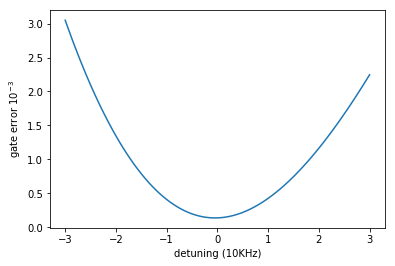

In [1092]:
U = np.linspace(-3,3,101) #KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u/1e2
    para = solve.copy()
    para[0] = para[0] + u
    fie[i] = 1-FIED_1(10,4,5,5,para,11,np.ones(10))[0]
plt.plot(U,[f*1e3 for f in fie])
plt.xlabel('detuning (10KHz)')
plt.ylabel('gate error $10^{-3}$')
# tick_locs = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
# Tick_locs = [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1 ,2, 5]
# plt.xticks(tick_locs, tick_locs)

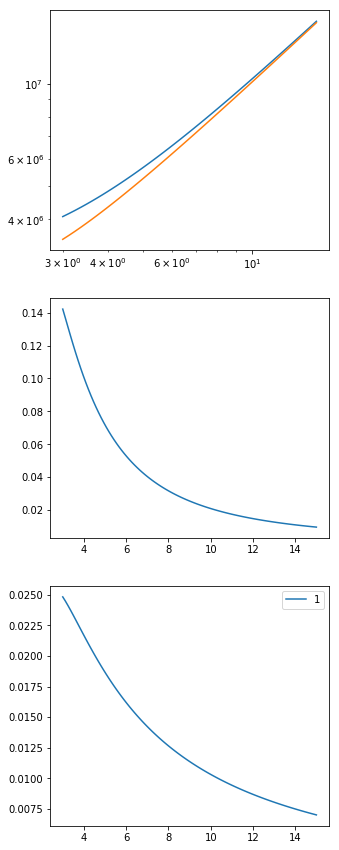

In [1083]:
U = np.linspace(3,15,100)
w_0 = np.zeros((4,100))


for i,u in enumerate(U):
    u = u*1e6
    w_0[0][i] = Coupling(10,4,5,5,u,u)[1][0]
    w_0[1][i] = Coupling(10,4,5,5,u,u)[1][1]
    w_0[2][i] = (Coupling(10,4,5,5,u,u)[1][0] - Coupling(10,4,5,5,u,u)[1][1])/Coupling(10,4,5,5,u,u)[1][0]
    w_0[3][i] = (Coupling(10,4,5,5,u,u)[0][0]*Coupling(10,4,5,5,u,u)[0][1])[0]

plt.figure(figsize=(5,15))
plt.subplot(311)        
for i in range(2):
    plt.loglog(U,w_0[i])

plt.subplot(312)        
plt.plot(U,w_0[2])

plt.subplot(313)        
plt.plot(U,w_0[3])

# tick_locs = [1 ,2, 4, 8]
# Tick_locs = [1 ,2, 4, 8]
# plt.xticks(tick_locs, tick_locs)
# plt.yticks(Tick_locs, Tick_locs)
# plt.xlabel('$\omega_{optic} \ {MHz}$')
# plt.ylabel('$\omega_{eig} \ {MHz}$')
# plt.xlim(1,10)
# plt.ylim(1,10)
plt.legend(('1','2','3','4','5','6','7','8'),fontsize=10)


In [1085]:
(((solve[0]*1e6+3e4)/c_optic)**2-(solve[0]*1e6/c_optic)**2)/(solve[0]*1e6/c_optic)**2

In [1207]:
fre = [17,17] # w (MHz)
t_list = [0.8,0.9,1.8,3.1] # us
phi_list = [3.8,1.98,3.29,5.17,10.38]
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))

res = minimize(lambda x: np.abs(np.cos(2*FIED_1(10,4,5,5,x,4,np.ones(10))[1]))**2+sum(FIED_1(10,4,5,5,x,4,np.ones(10))[2]),x0,tol=1e-7)
print(res.success)
print(res.x)

print(FIED_1(10,4,5,5,res.x,4,np.ones(10))[1],FIED_1(10,4,5,5,res.x,4,np.ones(10))[2])
print(FIED_1(10,4,5,5,res.x,4,np.ones(10))[0])

False
[17.12288802 17.12286177  1.79393063  0.9092626   2.09247293  3.01751903
  3.14159248  3.1415915   3.14159117  6.28318646  9.42477714]
-0.7853981553106324 [3.97315090e-16 3.64269884e-16 3.50495648e-15 4.84171772e-15
 2.42103491e-17 8.91309691e-18 1.23027639e-17 5.64256242e-18
 7.38495436e-17 5.05937011e-17]
0.9999999999999988


In [1208]:
solve = res.x 
print(solve)

[17.12288802 17.12286177  1.79393063  0.9092626   2.09247293  3.01751903
  3.14159248  3.1415915   3.14159117  6.28318646  9.42477714]


Text(0, 0.5, 'gate error $10^{-3}$')

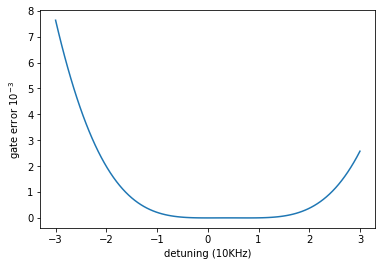

In [1217]:
U = np.linspace(-3,3,101) #10KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u/1e1
    para = solve.copy()
    para[0] = para[0] + u
    fie[i] = 1-FIED_1(10,4,5,5,para,4,np.ones(10))[0]
plt.plot(U,[f*1e3 for f in fie])
plt.xlabel('detuning (10KHz)')
plt.ylabel('gate error $10^{-3}$')


In [1116]:
(((solve[0]*1e6+3e5)/c_optic)**2-(solve[0]*1e6/c_optic)**2)/(solve[0]*1e6/c_optic)**2


## 考虑对称的情况

In [1174]:
def FIED_2(n,n1,n2,b,para,Np): #计算严格求解的非保真度，在考虑局域势的效益下
    w1 = para[0]*1e6
    w2 = para[1]*1e6
#     t_list = [0,para[2]*1e-6,para[3]*1e-6,para[4]*1e-6,para[5]*1e-6,tao]
    t_list = (np.array([0,para[2],para[2]+para[3],para[2]+para[3]+para[4],para[2]+para[3]*2+para[4],para[2]+para[3]*2+para[4]*2])*1e-6).tolist()
    phi_list = (np.array(np.concatenate((para[5:],para[-2:-4:-1])))).tolist()
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    D = DISPLACEMENT_1(C[0],C[1],t_list,phi_list)[0]*omega_1**2+DISPLACEMENT_1(C[0],C[1],t_list,phi_list)[1]*omega_2**2
    P = PHI_1(C[0],C[1],t_list,phi_list)*omega_1*omega_2
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
#         F = F + 4/3 * (1/2 + Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2) * D[i]
    return F,P,D,t_list,phi_list

In [1180]:
fre = [15,15] # w (MHz)
t_list = [0.75,2,3] # us
phi_list = [1,2,3]
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))

res = minimize(lambda x: 1-FIED_2(10,4,5,5,x,np.ones(10))[0],x0,tol=1e-7)
print(res.success)
print(res.x)

print(FIED_2(10,4,5,5,res.x,np.ones(10))[1],FIED_2(10,4,5,5,res.x,np.ones(10))[2])
print(FIED_2(10,4,5,5,res.x,np.ones(10))[0])

False
[15.97114785 15.88710521  0.4308108   2.07158116  2.84899078  3.14196448
  4.34000236  5.21055448]
-0.7853966811467614 [1.22025017e-12 6.47774586e-13 4.13154698e-04 7.73311517e-04
 4.55037836e-05 1.92884953e-05 8.95907334e-04 4.76576166e-04
 2.18164032e-03 1.60080937e-03]
0.999999697732093


In [1181]:
solve = res.x 
print(solve)

[15.97114785 15.88710521  0.4308108   2.07158116  2.84899078  3.14196448
  4.34000236  5.21055448]


Text(0, 0.5, 'gate error $10^{-3}$')

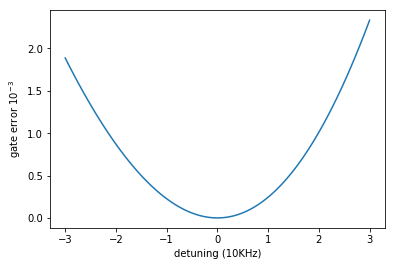

In [1185]:
U = np.linspace(-3,3,101) #10KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u/1e2
    para = solve.copy()
    para[0] = para[0] + u
    fie[i] = 1-FIED_2(10,4,5,5,para,np.ones(10))[0]
plt.plot(U,[f*1e3 for f in fie])
plt.xlabel('detuning (10KHz)')
plt.ylabel('gate error $10^{-3}$')

In [1187]:
fre = [15,15] # w (MHz)
t_list = [0.75,2,3] # us
phi_list = [1,2,3]
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))

res = minimize(lambda x: np.abs(np.cos(2*FIED_2(10,4,5,5,x,np.ones(10))[1]))**2+sum(FIED_2(10,4,5,5,x,np.ones(10))[2]),x0,tol=1e-7)
print(res.success)
print(res.x)

print(FIED_2(10,4,5,5,res.x,np.ones(10))[1],FIED_2(10,4,5,5,res.x,np.ones(10))[2])
print(FIED_2(10,4,5,5,res.x,np.ones(10))[0])

True
[12.94190331 12.94152594  0.09870698  1.64565692  3.08457374  3.14159383
  3.14159432  3.14159497]
-0.7853981456799448 [2.38012254e-14 1.77872977e-14 8.44607389e-16 1.01293996e-15
 1.00350719e-15 4.06819540e-16 4.28154141e-15 2.35502153e-15
 2.49313687e-14 1.56203883e-14]
0.9999999999999167


In [1205]:
solve = res.x 
print(solve)
(((solve[0]*1e6+3e6/50)/c_optic)**2-(solve[0]*1e6/c_optic)**2)/(solve[0]*1e6/c_optic)**2

[12.94190331 12.94152594  0.09870698  1.64565692  3.08457374  3.14159383
  3.14159432  3.14159497]


Text(0, 0.5, 'gate error $10^{-4}$')

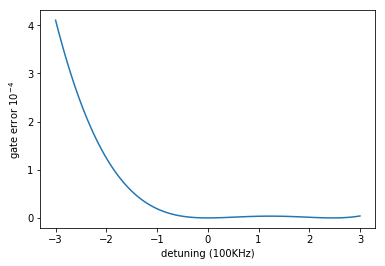

In [1204]:
U = np.linspace(-3,3,101) 
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u/50
    para = solve.copy()
    para[0] = para[0] + u
    fie[i] = 1-FIED_2(10,4,5,5,para,np.ones(10))[0]
plt.plot(U,[f*1e4 for f in fie])
plt.xlabel('detuning (100KHz)')
plt.ylabel('gate error $10^{-4}$')




## 计入失谐的情况

In [97]:
def f1(w,u,t1,t2,p):
    x = 0
    x = x - (u + w) * np.sin(p + t1 * (u - w))
    x = x + (u + w) * np.sin(p + t2 * (u - w))
    x = x + (u - w) * np.sin(p + t1 * (u + w))
    x = x - (u - w) * np.sin(p + t2 * (u + w))
    return 1/(2 * (u - w)*(u + w)) * x
# x 方向displacement要用的积分

In [98]:
def f2(w,u,t1,t2,p):
    x = 0
    x = x + (u + w) * np.cos(p + t1 * (u - w))
    x = x - (u + w) * np.cos(p + t2 * (u - w))
    x = x + (u - w) * np.cos(p + t1 * (u + w))
    x = x - (u - w) * np.cos(p + t2 * (u + w))
    return 1/(2 * (u - w) * (u + w)) * x
# p 方向displacement要用的积分

In [99]:
def f3(w,u,t1,t2,p):
    x = 0
    x = x + w * (u**2 - w**2) * np.sin(2 * (p + t1*u))
    x = x - w * (u**2 - w**2) * np.sin(2 * (p + t2*u)) 
    x = x + u * (u + w)**2 * np.sin((t1 - t2) * (u - w))
    x = x - u * (u - w) **2 * np.sin((t1 - t2) * (u + w)) 
    x = x - u * (u - w) * (u + w) *  2*w * (t1 - t2)
    x = x - u * (u - w) * (u + w) * np.sin( 2*p + t2 * (u - w) + t1 * (u + w)) 
    x = x + u * (u - w) * (u + w) * np.sin( 2*p + t1 * (u - w) + t2 * (u + w))
    return 1/(4 * u * (u - w)**2 * (u + w)**2) * x
# 积累出的相位要用的积分                                

In [100]:
def DISPLACEMENT_2(g,w_r,t_list,phi_list,u): # tao为门时间，u为激光之间失谐, 返回失谐模平方
    n = len(w_r)
    m = len(phi_list)
    a = np.zeros((2,n))
    for i in range(0,n):
        jf1 = 0
        jf2 = 0
        for j in range(0,m): 
            jf1 = jf1 + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf2 = jf2 + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        a[0][i] = g[0][i]**2 * (jf1**2 + jf2**2)
        a[1][i] = g[1][i]**2 * (jf1**2 + jf2**2)
    return a

In [101]:
def PHI_2(g,w_r,t_list,phi_list,u):
    n = len(w_r)
    m = len(phi_list)
    phi = 0
    for i in range(0,n):
        jf = 0
        for j in range(0,m):
            jf  = jf + f3(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        phi = phi + 2*g[0][i]*g[1][i]*jf
    return phi

In [371]:
def FIED_3(n,n1,n2,b,para,tao,Np,u): #计算严格求解的非保真度，在考虑局域势的效益下，para是所有参数，tao是总时间，u是失谐，Np是门之前剩余热分布
    w1 = para[0]*1e6
    w2 = para[1]*1e6
#     t_list = [0,para[2]*1e-6,para[3]*1e-6,para[4]*1e-6,para[5]*1e-6,tao]
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    b_r = C[2]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    D = DISPLACEMENT_2(C[0],C[1],t_list,phi_list,u)[0]*omega_1**2+DISPLACEMENT_2(C[0],C[1],t_list,phi_list,u)[1]*omega_2**2
    P = PHI_2(C[0],C[1],t_list,phi_list,u)*omega_1*omega_2
    F = 1/3 * abs(np.sin(2*P)) + 1/2
    for i in range(0,n):
          F = F + 1/(6*n) * np.exp(-8*n*(1/2+Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2)*D[i])    
#         F = F + 4/3 * (1/2 + Np[i])*(b_r[i][n1]**2+b_r[i][n2]**2) * D[i]
    return F,P,D

In [155]:
from scipy.optimize import minimize
fre = [10,10] # w (MHz)
t_list = [1.2,2.5,4,8] # us
phi_list = [3,2,3,4,4]
u = 11e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list)))) #参数设置，有光频，分段时间和失谐
# FIED_3(10,4,5,5,x0,10,np.ones(10),u)
res = minimize(lambda x: np.abs(FIED_3(10,4,5,5,x,10,np.ones(10),u)[1]+np.pi/4)**2+sum(FIED_3(10,4,5,5,x,10,np.ones(10),u)[2])*2+10*np.std(FIED_3(10,4,5,5,x,10,np.ones(10),u)[2],ddof=1),x0,tol=1e-7)
print(res.success)
print(res.x)
print(FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[1],FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[2])
print(FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[0])

False
[10.15549235  9.94520654  0.92756806  2.26841629  2.88293955  8.24252127
  1.80624866  2.95607056  2.53876508  3.32659003  4.3620091 ]
-0.7853768121458067 [4.62788293e-10 1.00658542e-09 1.28713488e-07 2.95308897e-07
 8.01832245e-07 3.10667451e-07 1.06307167e-07 5.94658975e-08
 1.18228560e-07 8.53839112e-08]
0.9999999964143186


In [156]:
solve = res.x 
print(solve)

[10.15549235  9.94520654  0.92756806  2.26841629  2.88293955  8.24252127
  1.80624866  2.95607056  2.53876508  3.32659003  4.3620091 ]


Text(0.5, 0, 'detuning (KHz)')

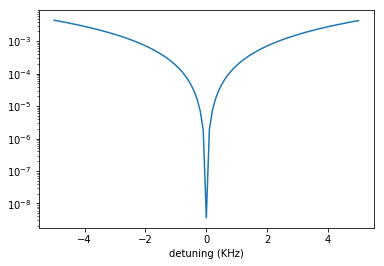

In [157]:
U = np.linspace(-5,5,101) #1KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e3
    fie[i] = 1-FIED_3(10,4,5,5,solve,10,np.ones(10),11*1e6+u)[0]
#     fie[i] = sum(FIED_3(10,4,5,5,res.x,10,np.ones(10),12*1e6+u)[2])
plt.semilogy(U,fie)
plt.xlabel('detuning (KHz)')
# plt.ylabel('gate error $10^{-3}$')

In [40]:
from scipy.optimize import minimize
fre = [11,11] # w (MHz)
t_list = [1,3,7,8] # us
phi_list = [3,2,3,4,4]
u = 12e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))
# FIED_3(10,4,5,5,x0,10,np.ones(10),u)
res = minimize(lambda x: np.abs(np.cos(2*FIED_3(10,4,5,5,x,10,np.ones(10),u)[1]))**2+sum(FIED_3(10,4,5,5,x,10,np.ones(10),u)[2]),x0,tol=1e-7)
print(res.success)
print(res.x)
print(FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[1],FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[2])
print(FIED_3(10,4,5,5,res.x,10,np.ones(10),u)[0])

False
[10.00464541 10.13138915  0.62993735  2.69731058  6.66372531  9.3773945
  4.54428104  5.31120706  5.79403236  3.97452583  3.84351139]
-0.7853961391105507 [4.57949895e-11 1.34371881e-10 6.65626519e-07 8.16585956e-07
 2.16386126e-06 8.07335028e-07 4.16991409e-07 2.64001380e-07
 1.03020643e-06 7.22199775e-07]
0.9999999981919514


In [41]:
solve = res.x 
print(solve)

[10.00464541 10.13138915  0.62993735  2.69731058  6.66372531  9.3773945
  4.54428104  5.31120706  5.79403236  3.97452583  3.84351139]


### 现在主要的偏移是失谐的偏移

Text(0.5, 0, 'detuning (KHz)')

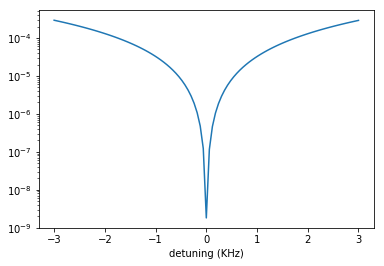

In [53]:
U = np.linspace(-3,3,101) #10KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e3
    fie[i] = 1-FIED_3(10,4,5,5,solve,10,np.ones(10),12*1e6+u)[0]
plt.semilogy(U,fie)
plt.xlabel('detuning (KHz)')

Text(0, 0.5, 'gate error $10^{-4}$')

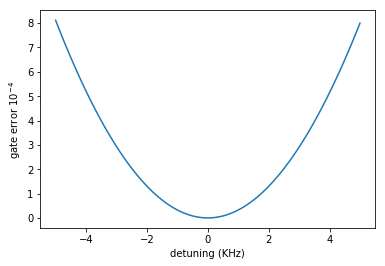

In [58]:
U = np.linspace(-5,5,101) #1KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e3
    fie[i] = 1-FIED_3(10,4,5,5,solve,10,np.ones(10),12*1e6+u)[0]
plt.plot(U,fie*1e4)
plt.xlabel('detuning (KHz)')
plt.ylabel('gate error $10^{-4}$')

### 现在主要的偏移是光强的抖动

Text(0, 0.5, 'gate error $10^{-3}$')

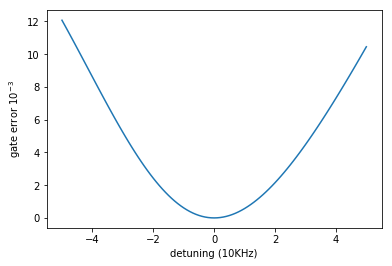

In [63]:
U = np.linspace(-5,5,101) #10KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u/1e2
    para = solve.copy()
    para[0] = para[0] + u
    fie[i] = 1-FIED_3(10,4,5,5,para,10,np.ones(10),12e6)[0]
plt.plot(U,[f*1e3 for f in fie])
plt.xlabel('detuning (10KHz)')
plt.ylabel('gate error $10^{-3}$')

In [64]:
(((solve[0]*1e6+5e4)/c_optic)**2-(solve[0]*1e6/c_optic)**2)/(solve[0]*1e6/c_optic)**2


### 不对称，第5个第8个离子打光结果

In [180]:
from scipy.optimize import minimize
fre = [15,15] # w (MHz)
t_list = [1,3,7,8] # us
phi_list = [3,2,3,4,4]
u = 15.5e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))
# FIED_3(10,4,5,5,x0,10,np.ones(10),u)
res = minimize(lambda x: np.abs(np.cos(2*FIED_3(10,4,7,5,x,10,np.ones(10),u)[1]))/3+sum(FIED_3(10,4,7,5,x,10,np.ones(10),u)[2])*2,x0,tol=1e-5)
print(res.success)
print(res.x)
print(FIED_3(10,4,7,5,res.x,10,np.ones(10),u)[1],FIED_3(10,4,7,5,res.x,10,np.ones(10),u)[2])
print(FIED_3(10,4,7,5,res.x,10,np.ones(10),u)[0])

False
[15.24999262 15.21326736  0.33815839  2.54711454  8.34986498  7.48932828
  5.5540207   5.03015569  7.93705626  8.24238361 10.71894746]
0.7853981633921647 [9.16927828e-07 2.24982545e-06 6.39456225e-05 1.05860016e-04
 1.79109653e-05 3.06592979e-05 5.09919717e-05 5.31207748e-06
 6.85230259e-05 4.46668665e-06]
0.9999936345382624


In [181]:
solve = res.x 
print(solve)

[15.24999262 15.21326736  0.33815839  2.54711454  8.34986498  7.48932828
  5.5540207   5.03015569  7.93705626  8.24238361 10.71894746]


Text(0.5, 0, 'detuning (KHz)')

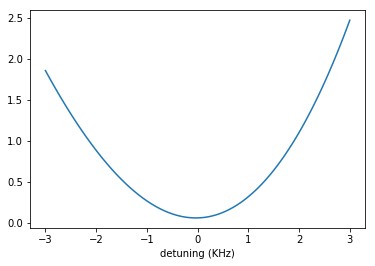

In [192]:
U = np.linspace(-3,3,101) #1KHz
fie = np.zeros(101)
for i,u in enumerate(U):
    u = u*1e3
    fie[i] = 1-FIED_3(10,4,7,5,solve,10,np.ones(10),15.5*1e6+u)[0]
plt.plot(U,fie*1e4)
plt.xlabel('detuning (KHz)')

### 不好优化: 第1个第十个离子打光

In [372]:
from scipy.optimize import minimize
fre = [11,11] # w (MHz)
t_list = [5,6.5,9.5,15] # us
phi_list = [1.3,2,1,2,3]
u = 11.4e6
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))
# FIED_3(10,0,9,5,x0,40.5,np.ones(10),u)
res = minimize(lambda x: np.abs(np.cos(2*FIED_3(10,0,9,5,x,40,np.ones(10),u)[1]))*10+sum(FIED_3(10,0,9,5,x,40,np.ones(10),u)[2])+FIED_3(10,0,9,5,x,40,np.ones(10),u)[2][0]*5+FIED_3(10,0,9,5,x,40,np.ones(10),u)[2][1]*5,x0,tol=1e-4)
res = minimize(lambda x: 1-FIED_3(10,0,9,5,x,40.5,np.ones(10),u)[0],x0,tol=1e-4)
print(res.success)
print(res.x)
print(FIED_3(10,0,9,5,res.x,40.5,np.ones(10),u)[1],FIED_3(10,0,9,5,res.x,40.5,np.ones(10),u)[2])
print(FIED_3(10,0,9,5,res.x,40.5,np.ones(10),u)[0])

True
[10.99440559 10.99440554  4.99995323  6.49999985  9.50000048 15.0011921
  1.29999982  2.00000001  0.99999962  2.00000031  3.00009281]
0.7853602201878471 [1.09533544e+03 1.09110257e+03 1.29119448e-06 5.52143091e-06
 6.64931450e-09 1.06097518e-05 6.12662137e-06 5.81295258e-06
 7.66002192e-07 5.40995264e-08]
0.9666666643741937


## 相空间

In [404]:
def traject(n,n1,n2,b,para,tao,t,Np,u):
    w1 = para[0]*1e6
    w2 = para[1]*1e6
    t = t * 1e-6
    t_list = (np.array(np.concatenate(([0],para[2:6],[tao])))*1e-6).tolist()
    phi_list = para[6:11]
    C = Coupling(n,n1,n2,b,w1,w2)
    g = C[0]
    w_r = C[1]
    omega_1 = c_rabi*w1**2
    omega_2 = c_rabi*w2**2 
    a = np.zeros((4,n))
    b = np.zeros((2,n))
    d = np.zeros(n)
    pos = 0
    while (t >= t_list[pos]):
        pos = pos+1
    for i in range(0,n):
        jf_x = 0
        jf_y = 0
        for j in range(0,pos-1): 
            jf_x = jf_x + f1(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
            jf_y = jf_y + f2(w_r[i],u,t_list[j+1],t_list[j],phi_list[j])
        jf_x = jf_x + f1(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        jf_y = jf_y + f2(w_r[i],u,t,t_list[pos-1],phi_list[pos-1])
        a[0][i] = g[0][i] * jf_x * omega_1 # 第一个离子第i个模式x方向位移
        a[1][i] = g[0][i] * jf_y * omega_1
        a[2][i] = g[1][i] * jf_x * omega_2
        a[3][i] = g[1][i] * jf_y * omega_2
    return a

In [398]:
hh = traject(10,4,5,5,x0,10,0.4,Np,u)[2]

In [401]:
T = np.linspace(0,1,100)
hhh = np.zeros(100)
hhhh = np.zeros(100)
for i,t in enumerate(T):
    hhh[i] = traject(10,4,5,5,x0,10,t,Np,u)[0]
    hhhh[i] = traject(10,4,5,5,x0,10,t,Np,u)[1]

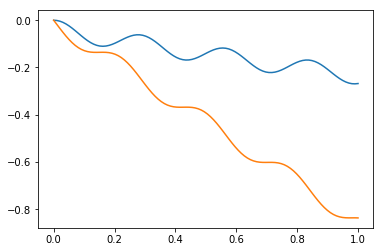

In [402]:
plt.plot(T,hhh)
plt.plot(T,hhhh)

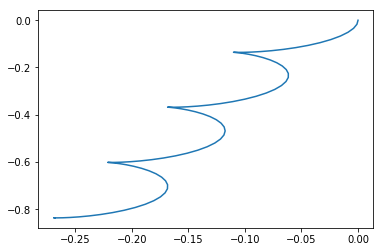

In [403]:
plt.plot(hhh,hhhh)

In [357]:
fre = [11,11] # w (MHz)
t_list = [1,3,7,8] # us
phi_list = [3,2,3,4,4]
u = 12e6
Np = np.ones(10)
x0 =  np.asarray((np.concatenate((fre,t_list,phi_list))))

In [369]:
T = np.linspace(0.1,9.9999,1000)
pos1_x = np.zeros((10,1000))
pos1_y = np.zeros((10,1000))
pos2_x = np.zeros((10,1000))
pos2_y = np.zeros((10,1000))
for i in range(10): # 第i个模式时刻t的坐标
    for j,t in enumerate(T):
        pos1_x[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[0][i]
        pos1_y[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[1][i]
        pos2_x[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[2][i]
        pos2_y[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[3][i]

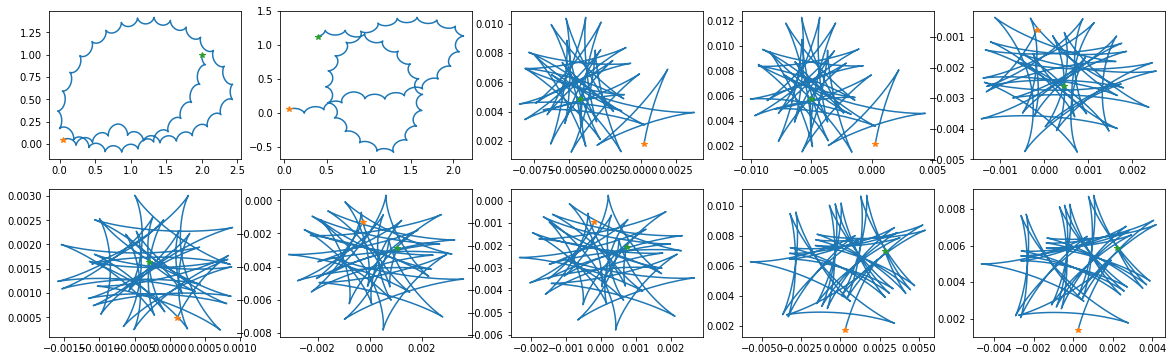

In [378]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(pos1_x[i],pos1_y[i])
    plt.plot(pos1_x[i][0],pos1_y[i][0],'*')
    plt.plot(pos1_x[i][999],pos1_y[i][999],'*')

上图有bug...还没画好，不知道为啥不连续，取得参数是随便的，保证度不高。。。

In [410]:
X = [10.15549235,9.94520654,0.92756806,2.26841629,2.8829395,8.24252127,1.80624866,2.95607056,2.53876508,3.32659003,4.3620091 ]
u = 11e6
T = np.linspace(0,9.9999,1000)
p1_x = np.zeros((10,1000))
p1_y = np.zeros((10,1000))
p2_x = np.zeros((10,1000))
p2_y = np.zeros((10,1000))
for i in range(10): # 第i个模式时刻t的坐标
    for j,t in enumerate(T):
        pos1_x[i][j] = traject(10,4,5,5,X,10,t,Np,u)[0][i]
        pos1_y[i][j] = traject(10,4,5,5,X,10,t,Np,u)[1][i]
        pos2_x[i][j] = traject(10,4,5,5,X,10,t,Np,u)[2][i]
        pos2_y[i][j] = traject(10,4,5,5,X,10,t,Np,u)[3][i]

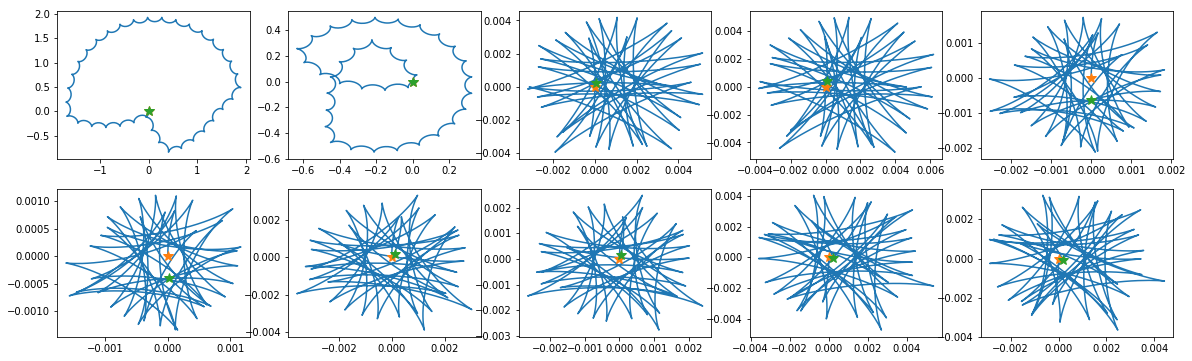

In [411]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(pos1_x[i],pos1_y[i])
    plt.plot(pos1_x[i][0],pos1_y[i][0],'*',ms='10')
    plt.plot(pos1_x[i][999],pos1_y[i][999],'*',ms='10')

In [381]:
T = np.linspace(0.1,1,1000)
P1_x = np.zeros((10,1000))
P1_y = np.zeros((10,1000))
P2_x = np.zeros((10,1000))
P2_y = np.zeros((10,1000))
for i in range(10): # 第i个模式时刻t的坐标
    for j,t in enumerate(T):
        P1_x[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[0][i]
        P1_y[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[1][i]
        P2_x[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[2][i]
        P2_y[i][j] = traject(10,4,5,5,x0,10,t,Np,u)[3][i]

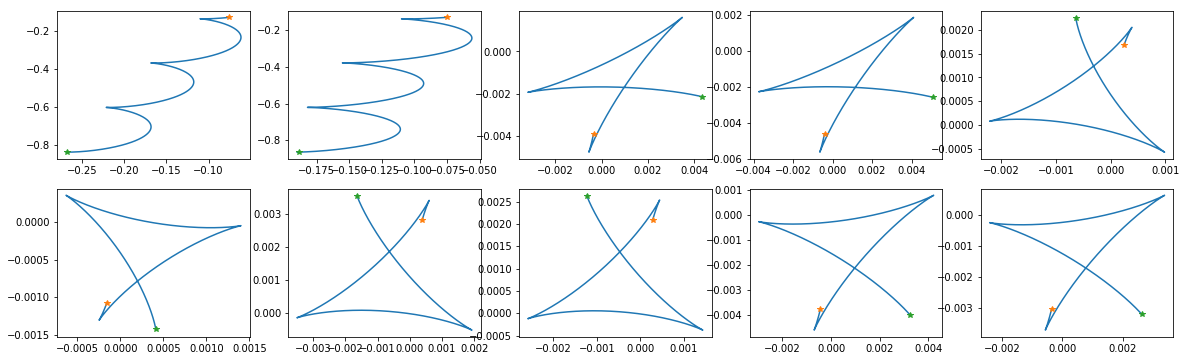

In [382]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(P1_x[i],P1_y[i])
    plt.plot(P1_x[i][0],P1_y[i][0],'*')
    plt.plot(P1_x[i][999],P1_y[i][999],'*')

## 频率分布图